<a href="https://colab.research.google.com/github/AmmarBMS/Machine-Learning/blob/main/1BM22CS035_LAB4_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving canada_per_capita_income.csv to canada_per_capita_income (5).csv
Index(['year', 'per capita income (US$)'], dtype='object')
   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
year                       0
per capita income (US$)    0
dtype: int64
Predicted Per Capita Income in 2020: 41288.69


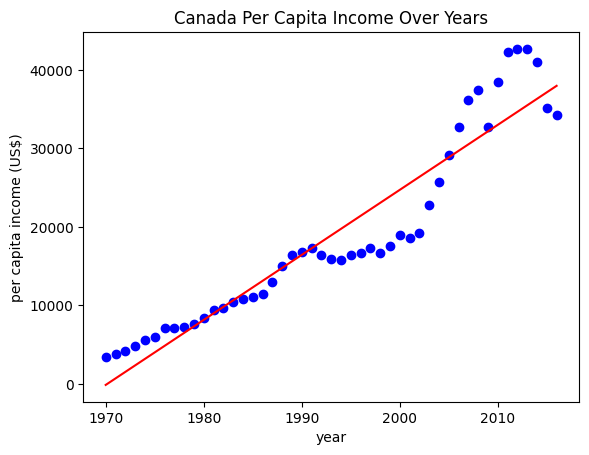

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()


canada_data = pd.read_csv('canada_per_capita_income.csv')


print(canada_data.columns)


print(canada_data.head())


print(canada_data.isnull().sum())


canada_data.dropna(inplace=True)


X = canada_data['year'].values.reshape(-1, 1)
y = canada_data['per capita income (US$)'].values


model = LinearRegression()
model.fit(X, y)


prediction_2020 = model.predict([[2020]])
print(f"Predicted Per Capita Income in 2020: {prediction_2020[0]:.2f}")


plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Canada Per Capita Income Over Years")
plt.xlabel("year")
plt.ylabel("per capita income (US$)")
plt.show()

Saving salary.csv to salary (1).csv
Index(['YearsExperience', 'Salary'], dtype='object')
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
YearsExperience    2
Salary             0
dtype: int64
Predicted Salary for 12 years of experience: 139049.67


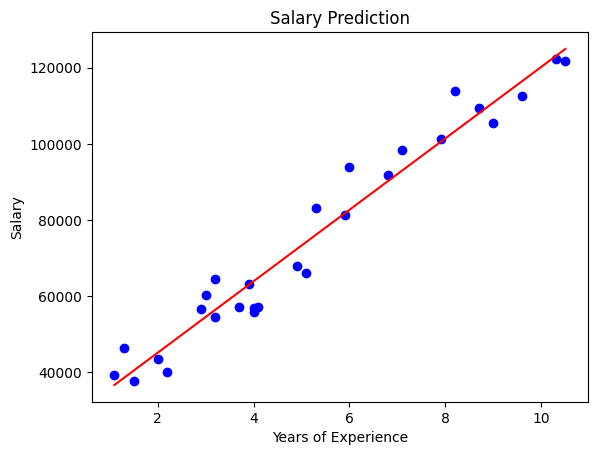

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()


salary_data = pd.read_csv('salary.csv')

print(salary_data.columns)
print(salary_data.head())
print(salary_data.isnull().sum())


salary_data.dropna(inplace=True)


X = salary_data['YearsExperience'].values.reshape(-1, 1)
y = salary_data['Salary'].values


model = LinearRegression()
model.fit(X, y)


experience = 12
predicted_salary = model.predict([[experience]])


print(f"Predicted Salary for {experience} years of experience: {predicted_salary[0]:.2f}")


plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Salary Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression

file_path = "/hiring.csv"
data = pd.read_csv(file_path)


def convert_to_int(value):
    word_to_num = {
        'one': 1,
        'two': 2,
        'three': 3,
        'four': 4,
        'five': 5,
        'six': 6,
        'seven': 7,
        'eight': 8,
        'nine': 9,
        'ten': 10,
        'eleven': 11,
        'twelve': 12,
        'zero': 0,
    }
    if pd.isnull(value):
        return value
    try:

        return int(value)
    except ValueError:

        return word_to_num.get(str(value).lower(), value)

data['experience'] = data['experience'].apply(convert_to_int)


data.fillna(data.mean(numeric_only=True), inplace=True)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]


model = LinearRegression()
model.fit(X, y)


candidates = np.array([[2, 9, 6], [12, 10, 10]])
predicted_salaries = model.predict(candidates)

print(f"Predicted salary for (2 yrs exp, 9 test score, 6 interview score): ${predicted_salaries[0]:.2f}")
print(f"Predicted salary for (12 yrs exp, 10 test score, 10 interview score): ${predicted_salaries[1]:.2f}")

Predicted salary for (2 yrs exp, 9 test score, 6 interview score): $47738.89
Predicted salary for (12 yrs exp, 10 test score, 10 interview score): $86424.67


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.preprocessing import LabelEncoder


file_path = "/1000_Companies.csv"
data = pd.read_csv(file_path)


data.fillna(data.mean(numeric_only=True), inplace=True)


label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])


X = data.iloc[:, :-1]
y = data.iloc[:, -1]


model = LinearRegression()
model.fit(X, y)


test_data = np.array([[91694.48, 15841.3, 11931.24, label_encoder.transform(['Florida'])[0]]])  # Input data
predicted_profit = model.predict(test_data)

print(f"Predicted profit: ${predicted_profit[0]:.2f}")


Predicted profit: $-2153.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


file_path = "/homeprices_Multiple_LR.csv"
data = pd.read_csv(file_path);


data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)


X = data[['area', 'bedrooms', 'age']]
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")


new_house = np.array([[3000, 3, 10]])
predicted_price = model.predict(new_house)

print(f"Predicted Price for a house with 3000 sq ft, 3 bedrooms, 10 years old: ${predicted_price[0]:.2f}")


Model Coefficients: [  115.67164179 38432.8358209  -1902.98507463]
Model Intercept: 120373.13432834996
R² Score: -29.46
Mean Absolute Error (MAE): $39608.21
Root Mean Squared Error (RMSE): $41395.86
Predicted Price for a house with 3000 sq ft, 3 bedrooms, 10 years old: $563656.72


<ipython-input-24-52dfed456c13>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


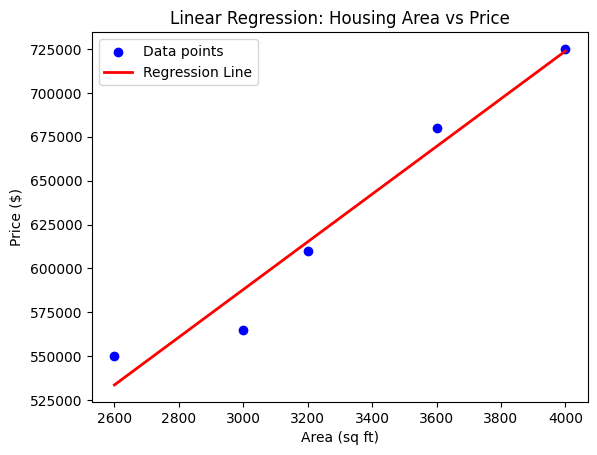

Model Equation: Price = 135.79 * Area + 180616.44
Predicted Price for 3000 sq ft: $587979.45


In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


file_path = "/housing_area_price.csv"
data = pd.read_csv(file_path);


X = data[['area']].values
y = data['price'].values


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Linear Regression: Housing Area vs Price')
plt.legend()
plt.show()


slope = model.coef_[0]
intercept = model.intercept_
print(f"Model Equation: Price = {slope:.2f} * Area + {intercept:.2f}")


new_area = np.array([[3000]])
predicted_price = model.predict(new_area)
print(f"Predicted Price for 3000 sq ft: ${predicted_price[0]:.2f}")
